=== combinations: N0, N1
=== combinations: N0, N2
=== combinations: N0, N3
=== combinations: N0, N4
=== combinations: N1, N2
=== combinations: N1, N3
=== combinations: N1, N4
=== combinations: N2, N3
=== combinations: N2, N4
=== combinations: N3, N4
All segments: ['N0-R1', 'R1-R2', 'R2-N1', 'N0-R1', 'R1-R2', 'R2-N2', 'N0-R1', 'R1-R2', 'R2-N3', 'N0-R1', 'R1-R2', 'R2-N4', 'N1-R1', 'R1-R2', 'R2-N2', 'N1-R1', 'R1-R2', 'R2-N3', 'N1-R1', 'R1-R2', 'R2-N4', 'N2-R1', 'R1-R2', 'R2-N3', 'N2-R1', 'R1-R2', 'R2-N4', 'N3-R1', 'R1-R2', 'R2-N4']
Unique segments: ['R2-N4', 'N3-R1', 'N0-R1', 'R1-R2', 'R2-N1', 'N1-R1', 'R2-N2', 'N2-R1', 'R2-N3']

Segment crosstalk dictionary: {'R2-N4': 4, 'N3-R1': 1, 'N0-R1': 4, 'R1-R2': 10, 'R2-N1': 1, 'N1-R1': 3, 'R2-N2': 2, 'N2-R1': 2, 'R2-N3': 3}


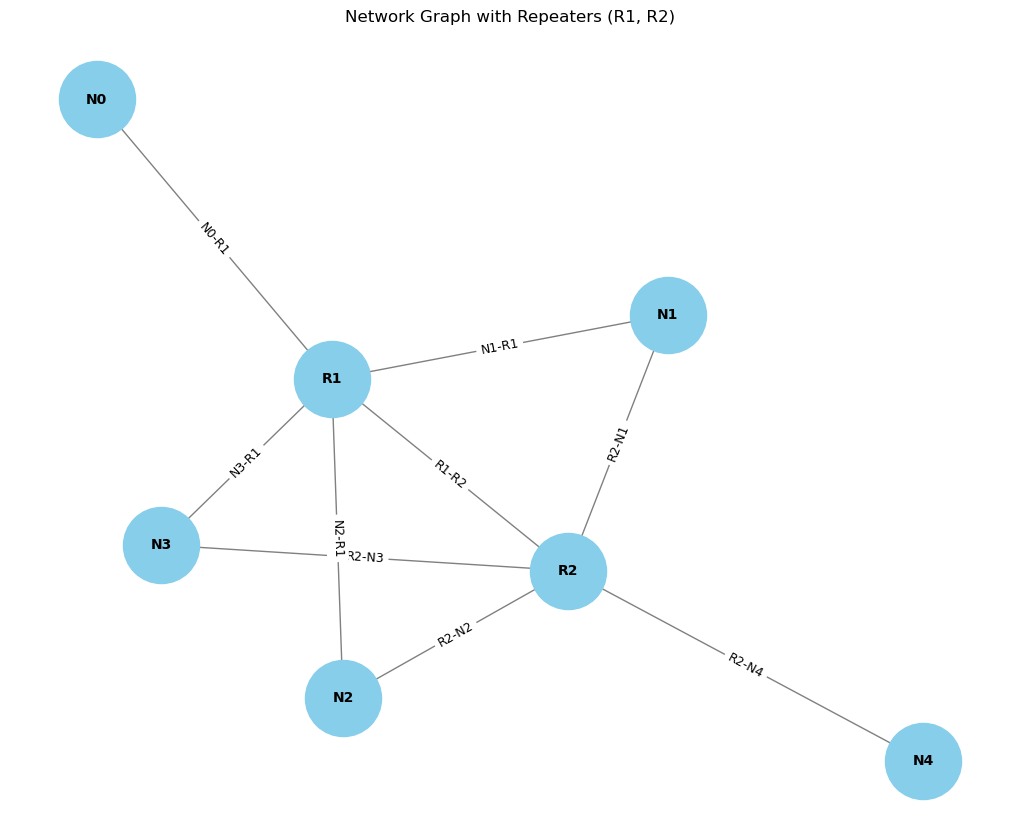

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

class Node:
    def __init__(self, name):
        self.name = name
        self.edges = []

    def add_edge(self, node):
        self.edges.append(node)

    def __repr__(self):
        return f"Node({self.name})"


class Graph:
    def __init__(self):
        self.nodes = {}

    def add_node(self, node):
        self.nodes[node.name] = node

    def get_node(self, node_name):
        return self.nodes.get(node_name)

    def add_edge(self, src, dst):
        if src.name not in self.nodes:
            self.add_node(src)
        if dst.name not in self.nodes:
            self.add_node(dst)
        src.add_edge(dst)
        dst.add_edge(src)

    def __repr__(self):
        return f"Graph with {len(self.nodes)} nodes"


# Step 1: Create nodes
nodes = [Node(f'N{i}') for i in range(5)]

# Step 2: Initialize the graph
graph = Graph()

# Step 3: Add edges based on node combinations
all_segments = []

# Create all node-to-node combinations and define their segments with R1 and R2 repeaters
for src, dst in combinations(nodes, 2):  # Total 10 links
    print(f"=== combinations: {src.name}, {dst.name}")
    segments = [f"{src.name}-R1", "R1-R2", f"R2-{dst.name}"]
    all_segments += segments
    graph.add_edge(src, dst)

# Step 4: Print all segments
print("All segments:", all_segments)

# Step 5: Get unique segments
unique_segments = list(set(all_segments))
print("Unique segments:", unique_segments)

# Step 6: Count segment crosstalk
segment_cross_talk_dict = {}

for segment in unique_segments:
    count = all_segments.count(segment)
    if count > 0:
        segment_cross_talk_dict[segment] = count

print("\nSegment crosstalk dictionary:", segment_cross_talk_dict)


# Step 7: Visualize the graph with repeaters using NetworkX and Matplotlib

# Create a NetworkX graph
G = nx.Graph()

# Add the original nodes (N0, N1, N2, etc.) to the NetworkX graph
for node in graph.nodes.values():
    G.add_node(node.name)

# Add repeaters (R1, R2) as intermediary nodes for each edge
for src, dst in combinations(nodes, 2):
    # Add repeaters (R1, R2) as intermediary nodes between each pair
    G.add_node("R1")
    G.add_node("R2")
    
    # Add edges with repeaters
    G.add_edge(src.name, "R1")
    G.add_edge("R1", "R2")
    G.add_edge("R2", dst.name)

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning the nodes with a layout

# Draw nodes, labels, and edges
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray')

# Draw the edge labels to indicate the segments
edge_labels = {}
for src, dst in combinations(nodes, 2):
    edge_labels[(src.name, "R1")] = f"{src.name}-R1"
    edge_labels[("R1", "R2")] = "R1-R2"
    edge_labels[("R2", dst.name)] = f"R2-{dst.name}"

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

# Set plot title and show the graph
plt.title("Network Graph with Repeaters (R1, R2)")
plt.show()
